This code does the voltage and thershold scans i created. To use it just copy the restuls of timing resolution into here. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit, minimize
from scipy.signal import fftconvolve
import numpy as np
plt.rcParams.update({
    'font.size': 16,          # Global default font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 16,    # X tick size
    'ytick.labelsize': 16,    # Y tick size
    'legend.fontsize': 13,    # Legend font size
})

In [2]:
def linear(x,m,b):
    return (m*x) + b

def cos(x, A, f, offset):
    return A*np.cos(((2.0*pi)/f)*(x-54.0))+offset

In [3]:
vbias_demandedP2= [53,52.75,53.5,54,54.5,55,55.5,56]
vbias_demanded7G = [55.5,55.5,55.5,55.5,55.5,55.5,55.5,55.5]
time_res = [0.4960,0.501,0.3760,0.3189,0.3925,0.3588,0.2973,0.3410]
time_res_u = [0.0504,0.0499,0.0259,0.0153, 0.0310,0.0238,0.0114,0.0299]
print(len(vbias_demandedP2))
print(len(time_res))

8
8


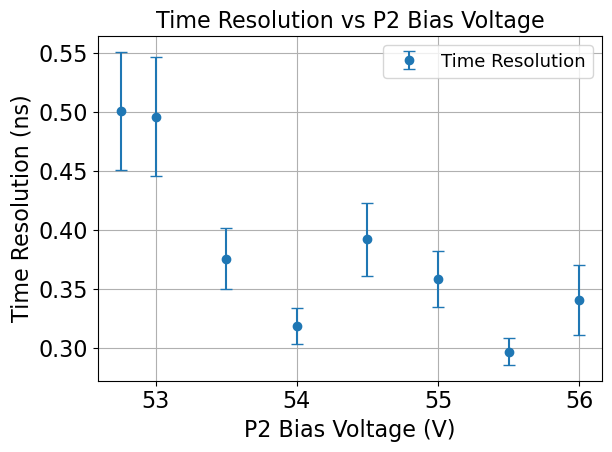

In [4]:
# Plot
plt.errorbar(vbias_demandedP2, time_res, yerr=time_res_u, fmt='o', capsize=4, label='Time Resolution')
plt.xlabel("P2 Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs P2 Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
vbias_demandedP2= [55.5,55.5,55.5,55.5,55.5,55.5]
vbias_demanded7G = [53.5,54,54.5,55,55.5,56]
time_res = [1.0224, 0.3635,0.3630,0.3845,0.2973,0.3354]
time_res_u = [0.1464,0.0165,0.0505,0.0400,0.0114,0.0194]
print(len(vbias_demandedP2))
print(len(time_res))

6
6


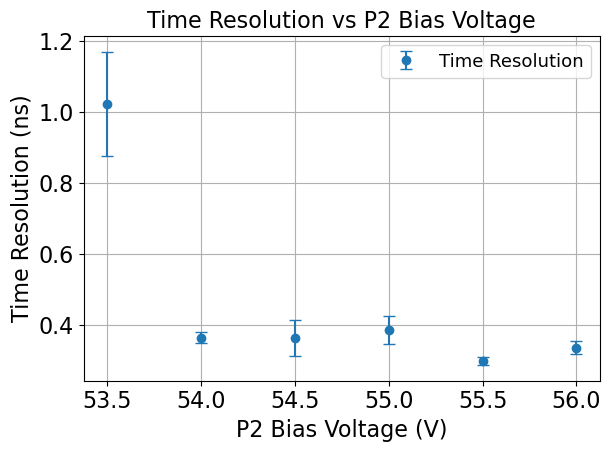

In [6]:
# Plot
plt.errorbar(vbias_demanded7G, time_res, yerr=time_res_u, fmt='o', capsize=4, label='Time Resolution')
plt.xlabel("P2 Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs P2 Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
vbias_demandedP2= [53.5,54,54.5,55,55.5,56]
vbias_demanded7G = vbias_demandedP2
time_res = [0.7009,  0.3061,0.3869,0.3084,0.2973,0.3812  ]
time_res_u = [0.0607,0.0107,0.0408,0.0103,0.0114, 0.0147]
print(len(vbias_demandedP2))
print(len(time_res))

6
6


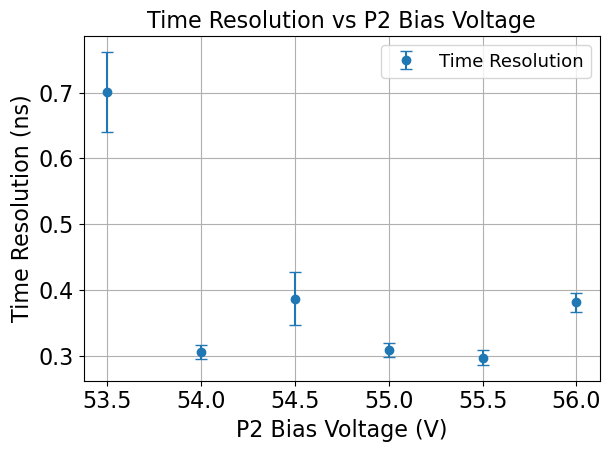

In [8]:
# Plot
plt.errorbar(vbias_demanded7G, time_res, yerr=time_res_u, fmt='o', capsize=4, label='Time Resolution')
plt.xlabel("P2 Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs P2 Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

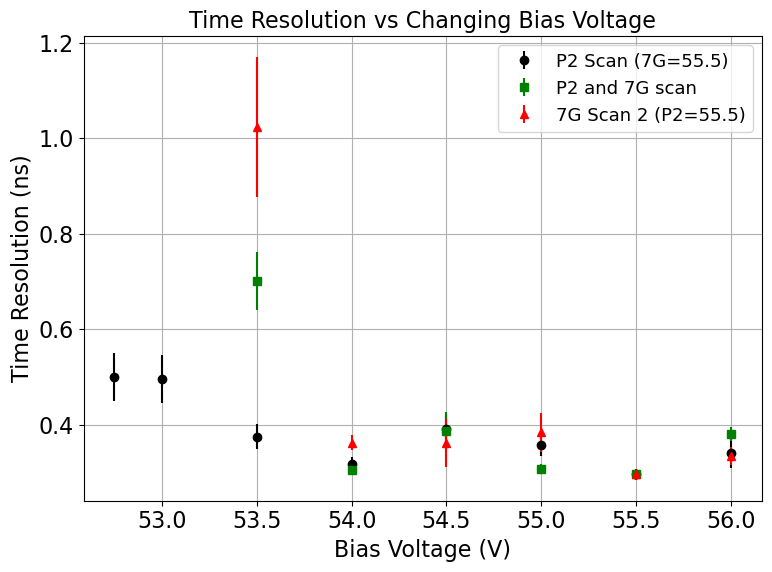

In [9]:
import matplotlib.pyplot as plt

# Dataset 1: P2 scan (7G fixed)
vbias_P2 = [53, 52.75, 53.5, 54, 54.5, 55, 55.5, 56]
tres_P2 = [0.4960, 0.501, 0.3760, 0.3189, 0.3925, 0.3588, 0.2973, 0.3410]
tresu_P2 = [0.0504, 0.0499, 0.0259, 0.0153, 0.0310, 0.0238, 0.0114, 0.0299]

# Dataset 2: 7G scan (P2 varied)
vbias_P2_7G = [53.5, 54, 54.5, 55, 55.5, 56]
tres_7G = [0.7009, 0.3061, 0.3869, 0.3084, 0.2973, 0.3812]
tresu_7G = [0.0607, 0.0107, 0.0408, 0.0103, 0.0114, 0.0147]

# Dataset 3: 7G scan (P2 fixed at 55.5)
vbias_7G_scan = [53.5, 54, 54.5, 55, 55.5, 56]
tres_7G_scan = [1.0224, 0.3635, 0.3630, 0.3845, 0.2973, 0.3354]
tresu_7G_scan = [0.1464, 0.0165, 0.0505, 0.0400, 0.0114, 0.0194]

# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_P2, tres_P2, yerr=tresu_P2, fmt='o', label='P2 Scan (7G=55.5)', color='black')
plt.errorbar(vbias_P2_7G, tres_7G, yerr=tresu_7G, fmt='s', label='P2 and 7G scan', color='green')
plt.errorbar(vbias_7G_scan, tres_7G_scan, yerr=tresu_7G_scan, fmt='^', label='7G Scan 2 (P2=55.5)', color='red')

plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


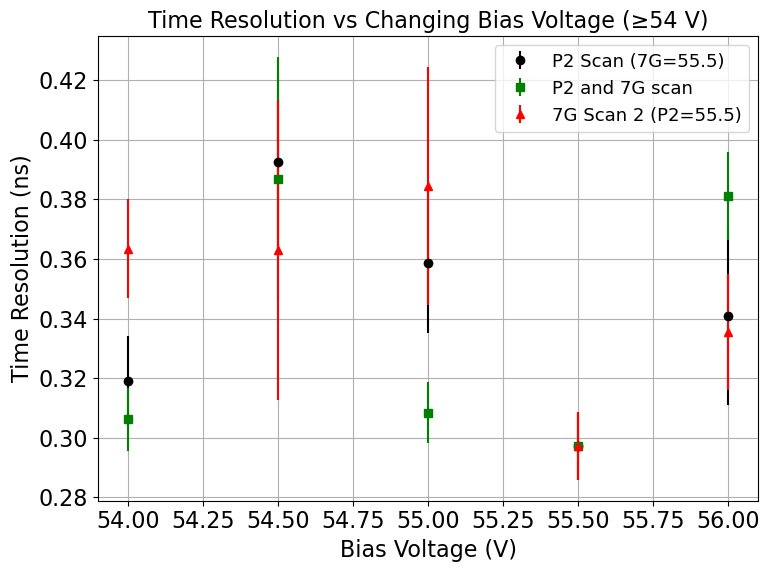

In [10]:
import matplotlib.pyplot as plt

# Dataset 1: P2 scan (7G fixed)
vbias_P2 = [54, 54.5, 55, 55.5, 56]
tres_P2 = [0.3189, 0.3925, 0.3588, 0.2973, 0.3410]
tresu_P2 = [0.0153, 0.0310, 0.0238, 0.0114, 0.0299]

# Dataset 2: 7G scan (P2 varied)
vbias_P2_7G = [54, 54.5, 55, 55.5, 56]
tres_7G = [0.3061, 0.3869, 0.3084, 0.2973, 0.3812]
tresu_7G = [0.0107, 0.0408, 0.0103, 0.0114, 0.0147]

# Dataset 3: 7G scan (P2 fixed at 55.5)
vbias_7G_scan = [54, 54.5, 55, 55.5, 56]
tres_7G_scan = [0.3635, 0.3630, 0.3845, 0.2973, 0.3354]
tresu_7G_scan = [0.0165, 0.0505, 0.0400, 0.0114, 0.0194]

# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_P2, tres_P2, yerr=tresu_P2, fmt='o', label='P2 Scan (7G=55.5)', color='black')
plt.errorbar(vbias_P2_7G, tres_7G, yerr=tresu_7G, fmt='s', label='P2 and 7G scan', color='green')
plt.errorbar(vbias_7G_scan, tres_7G_scan, yerr=tresu_7G_scan, fmt='^', label='7G Scan 2 (P2=55.5)', color='red')

plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage (â‰¥54 V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
vbias_14N_5E = [ 53.5, 54, 54.5, 55, 55.5, 56,56.5]
tres_14N_5E = [ 0.5444617035863566, 0.36616341073696623, 0.256856675263636, 0.2648260289439633, 0.2819185093341011, 0.249631882686063, 0.258599588833724]
tresu_14N_5E = [ 0.03953238017399535,0.04299130715067598, 0.010057356972928077, 0.00920782743618961, 0.028908875430857062, 0.009524432868837593, 0.01045730728404346]


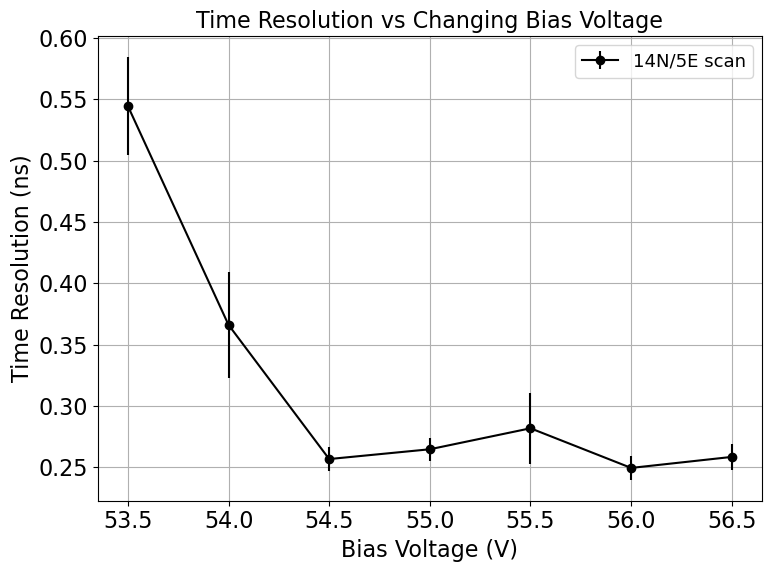

In [12]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,tres_14N_5E, tresu_14N_5E, fmt='o-', label='14N/5E scan', color='black')

plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
vbias_14N = [53.5, 54, 54.5, 55, 55.5, 56,56.5]
tres_14N = [ 0.5467119132613936, 0.5249267918992356, 0.23461362236065375,0.264826028943963, 0.24119168374505823, 0.27223892271966277, 0.26678121966980683]
tresu_14N = [ 0.03542361589516308, 0.13745778404330272, 0.006536854864593801, 0.00920782743618961,0.009490845506443798, 0.029746122301275518, 0.026711707641864826]
print(len(vbias_14N))
print(len(tres_14N))
print(len(tresu_14N))

7
7
7


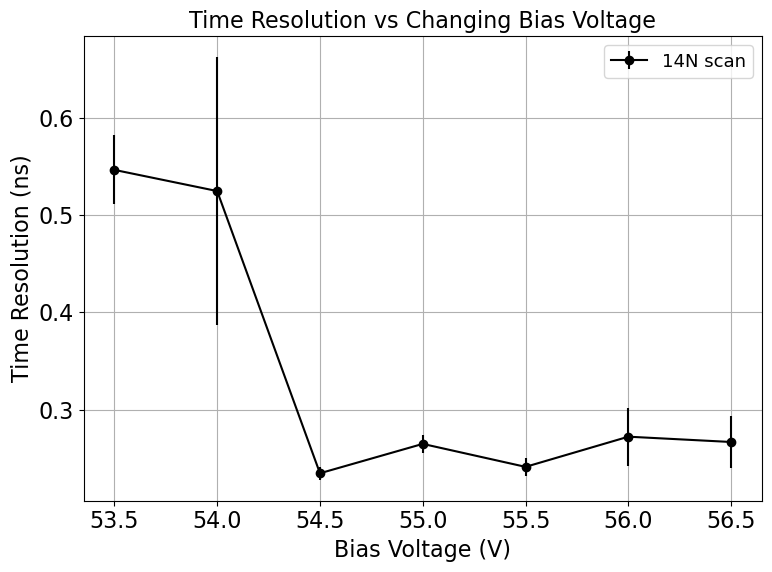

In [14]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N,tres_14N, tresu_14N, fmt='o-', label='14N scan', color='black')

plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
vbias_5E = [53.5, 54, 54.5, 55, 55.5, 56,56.5]
tres_5E = [ 0.5483129199443689, 0.30370987066721034, 0.3043183069050804, 0.264826028943963,0.2465484684895381, 0.32130336488937894, 0.2369408554320969]
tresu_5E = [0.10987203262795069, 0.011791825680099077, 0.017152900324116944, 0.00920782743618961,0.015606522274370694, 0.0736393382707333, 0.015242800900989274]
print(len(vbias_5E))
print(len(tres_5E))
print(len(tresu_5E))

7
7
7


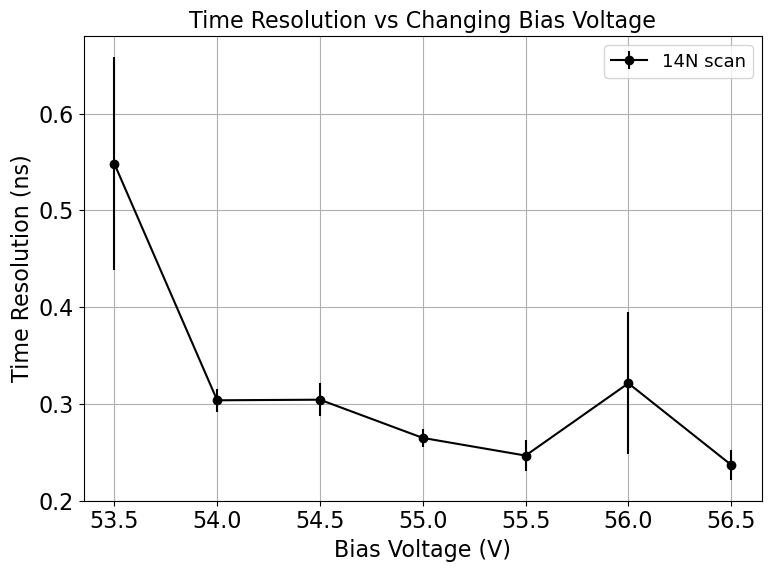

In [16]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E,tres_5E, tresu_5E, fmt='o-', label='14N scan', color='black')

plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
vbias_5E = [53.5, 54, 54.5, 55, 55.5, 56,56.5]

tres_5E = [ 0.5483129199443689, 0.30370987066721034, 0.3043183069050804, 0.264826028943963,0.2465484684895381, 0.32130336488937894, 0.2369408554320969]
tresu_5E = [0.10987203262795069, 0.011791825680099077, 0.017152900324116944, 0.00920782743618961,0.015606522274370694, 0.0736393382707333, 0.015242800900989274]

vbias_14N = [53.5, 54, 54.5, 55, 55.5, 56,56.5]
tres_14N = [ 0.5467119132613936, 0.5249267918992356, 0.23461362236065375,0.264826028943963, 0.24119168374505823, 0.27223892271966277, 0.26678121966980683]
tresu_14N = [ 0.03542361589516308, 0.13745778404330272, 0.006536854864593801, 0.00920782743618961,0.009490845506443798, 0.029746122301275518, 0.026711707641864826]

vbias_14N_5E = [ 53.5, 54, 54.5, 55, 55.5, 56,56.5]
vbias_14N_5E_14Nmeasured= [52.62,53.145,53.669,54.139,54.6,55.039,55.465,55.894,56.1]
vbias_14N_5E_5Emeasured= [52.478,52.999,53.502,53.981,54.434,54.893,55.33,55.774,55.951]
tres_14N_5E = [ 0.5444617035863566, 0.36616341073696623, 0.256856675263636, 0.2648260289439633, 0.2819185093341011, 0.249631882686063, 0.258599588833724]
tresu_14N_5E = [ 0.03953238017399535,0.04299130715067598, 0.010057356972928077, 0.00920782743618961, 0.028908875430857062, 0.009524432868837593, 0.01045730728404346]


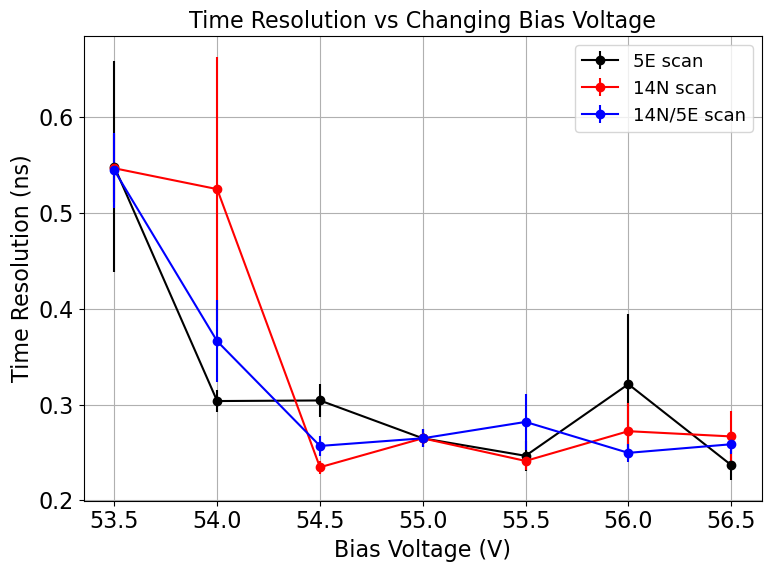

In [18]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E,tres_5E, tresu_5E, fmt='o-', label='5E scan', color='black')
plt.errorbar(vbias_14N,tres_14N, tresu_14N, fmt='o-', label='14N scan', color='red')
plt.errorbar(vbias_14N_5E,tres_14N_5E, tresu_14N_5E, fmt='o-', label='14N/5E scan', color='blue')
plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
vbias_14N_5E = [52.5,53, 53.5, 54, 54.5, 55, 55.5, 56,56.5]
vbias_14N_5E_14Nmeasured= [52.62,53.145,53.669,54.139,54.6,55.039,55.465,55.894,56.1]
vbias_14N_5E_5Emeasured= [52.478,52.999,53.502,53.981,54.434,54.893,55.33,55.774,55.951]

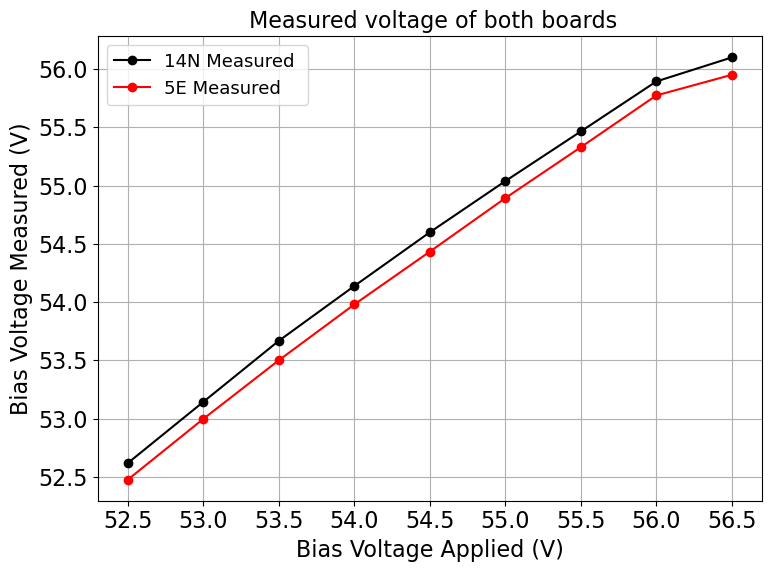

In [20]:
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,vbias_14N_5E_14Nmeasured, fmt='o-', label='14N Measured ', color='black')
plt.errorbar(vbias_14N_5E,vbias_14N_5E_5Emeasured, fmt='o-', label='5E Measured', color='red')

plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Bias Voltage Measured (V)")
plt.title(" Measured voltage of both boards")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
vbias_14N_5E = [52.5,53, 53.5, 54, 54.5, 55, 55.5, 56,56.5]
vbias_14N_14Nmeasured= [52.619,53.143,53.665,54.136,54.6,55.039,55.468,55.907,56.1]

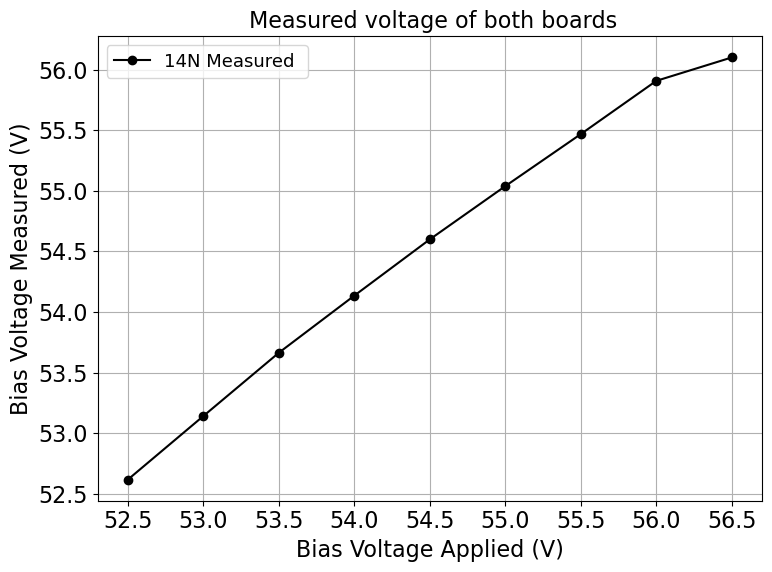

In [22]:
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,vbias_14N_14Nmeasured, fmt='o-', label='14N Measured ', color='black')


plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Bias Voltage Measured (V)")
plt.title(" Measured voltage of both boards")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
vbias_14N_5E = [52.5,53, 53.5, 54, 54.5, 55, 55.5, 56,56.5]
vbias_5E_5Emeasured= [52.475,52.991,53.495,53.98,54.443,54.893,55.352,55.8,55.98,]

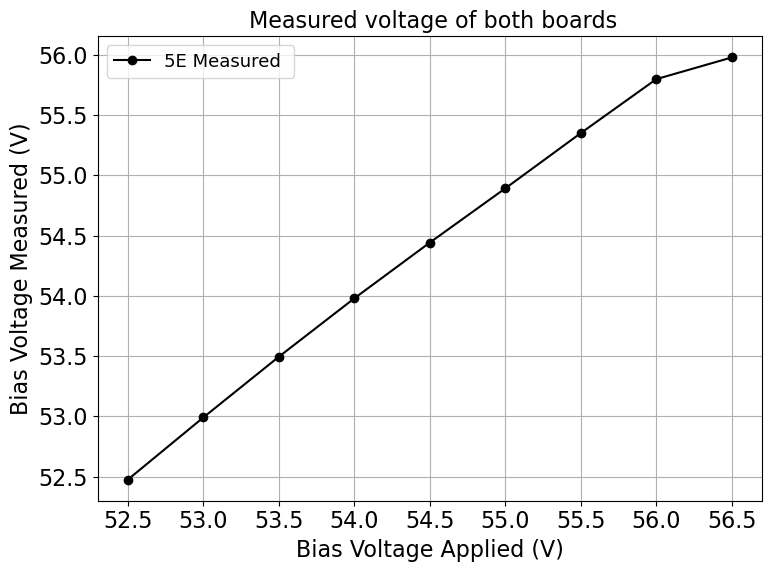

In [24]:
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,vbias_5E_5Emeasured, fmt='o-', label='5E Measured ', color='black')



plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Bias Voltage Measured (V)")
plt.title(" Measured voltage of both boards")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

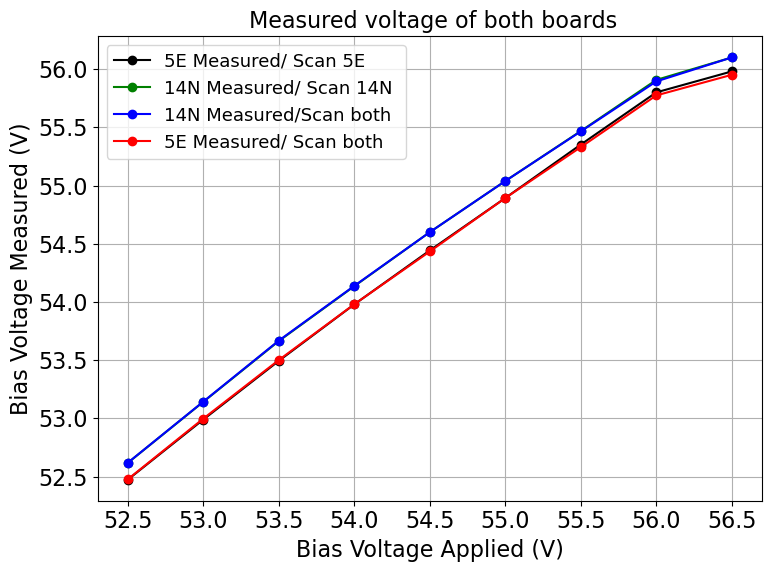

In [25]:
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,vbias_5E_5Emeasured, fmt='o-', label='5E Measured/ Scan 5E ', color='black')
plt.errorbar(vbias_14N_5E,vbias_14N_14Nmeasured, fmt='o-', label='14N Measured/ Scan 14N ', color='green')
plt.errorbar(vbias_14N_5E,vbias_14N_5E_14Nmeasured, fmt='o-', label='14N Measured/Scan both ', color='blue')
plt.errorbar(vbias_14N_5E,vbias_14N_5E_5Emeasured, fmt='o-', label='5E Measured/ Scan both', color='red')

plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Bias Voltage Measured (V)")
plt.title(" Measured voltage of both boards")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
vbias_14N_5E = [52.5,53, 53.5, 54, 54.5, 55, 55.5, 56,56.5]
vbias_5E_5Emeasured= [53.495,53.98,54.443,54.893,55.352,55.8,55.98,]
vbias_14N_14Nmeasured= [53.665,54.136,54.6,55.039,55.468,55.907,56.1]
vbias_14N_5E_14Nmeasured= [53.669,54.139,54.6,55.039,55.465,55.894,56.1]
vbias_14N_5E_5Emeasured= [53.502,53.981,54.434,54.893,55.33,55.774,55.951]

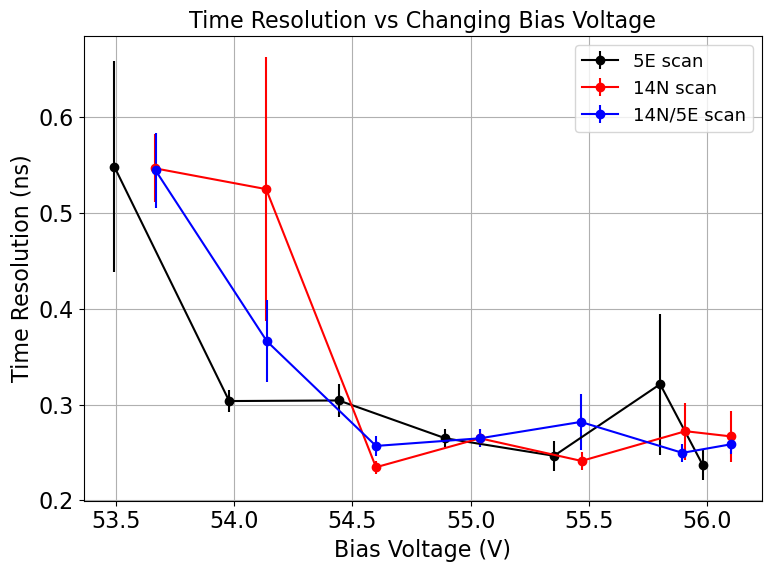

In [27]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E_5Emeasured,tres_5E, tresu_5E, fmt='o-', label='5E scan', color='black')
plt.errorbar(vbias_14N_14Nmeasured,tres_14N, tresu_14N, fmt='o-', label='14N scan', color='red')
plt.errorbar(vbias_14N_5E_14Nmeasured,tres_14N_5E, tresu_14N_5E, fmt='o-', label='14N/5E scan', color='blue')
plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7
7
7


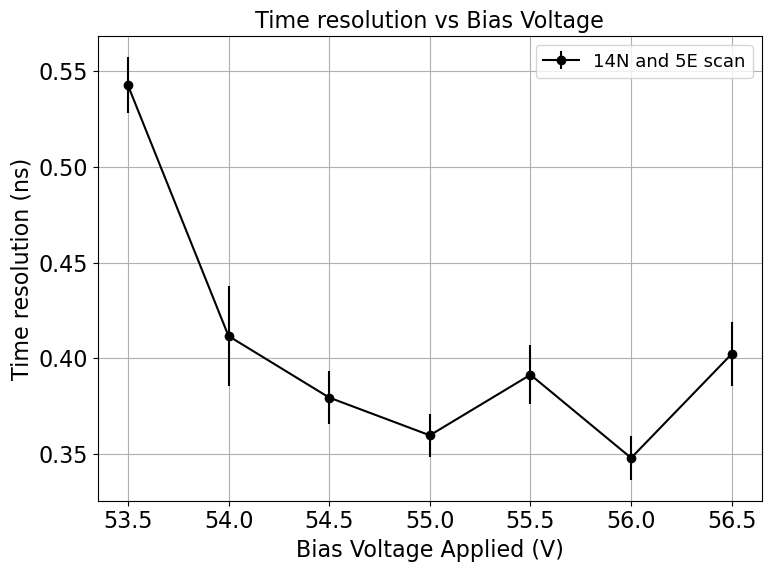

In [28]:
vbias_14N_5E = [53.5, 54, 54.5, 55, 55.5, 56,56.5]
tres_14N_5E = [0.5426, 0.4117, 0.3796, 0.3599, 0.3915, 0.3481, 0.4024]
tresu_14N_5E = [0.0144, 0.0261, 0.0136, 0.0113, 0.0154, 0.0113, 0.0166]
print(len(vbias_14N))
print(len(tres_14N))
print(len(tresu_14N))
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N_5E,tres_14N_5E,yerr=tresu_14N_5E, fmt='o-', label='14N and 5E scan', color='black')
plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Time resolution (ns)")
plt.title(" Time resolution vs Bias Voltage ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

6
6
6


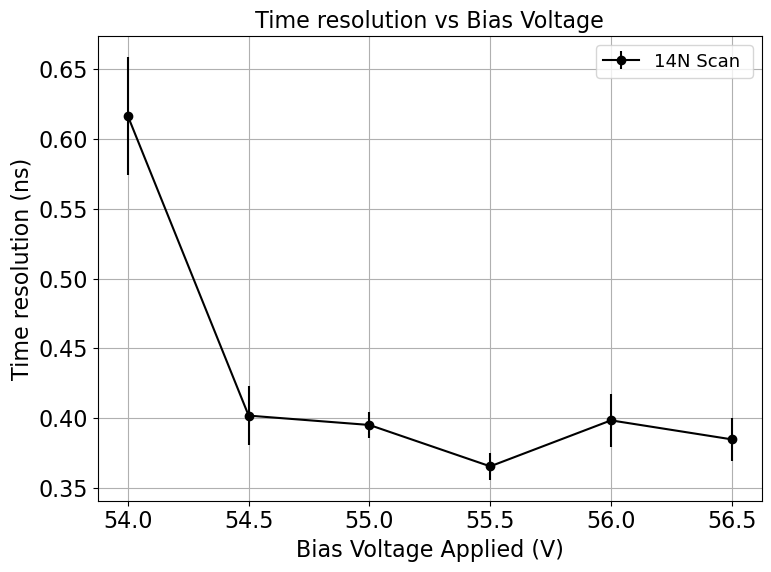

In [29]:
vbias_14N = [54, 54.5, 55, 55.5, 56,56.5]
tres_14N = [0.6163, 0.4019, 0.3952, 0.3656, 0.3985, 0.3849]
tresu_14N = [0.0419, 0.021, 0.0094, 0.0095, 0.0188, 0.0154]
print(len(vbias_14N))
print(len(tres_14N))
print(len(tresu_14N))
plt.figure(figsize=(8,6))

plt.errorbar(vbias_14N,tres_14N,yerr=tresu_14N, fmt='o-', label='14N Scan ', color='black')
plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Time resolution (ns)")
plt.title(" Time resolution vs Bias Voltage ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7
7
7


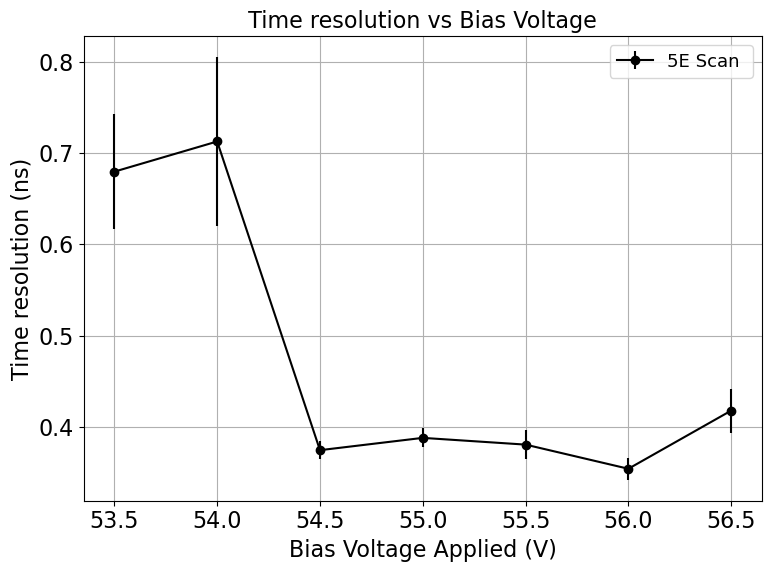

In [30]:
vbias_5E = [53.5,54, 54.5, 55, 55.5, 56,56.5]
tres_5E = [0.6798, 0.7129, 0.3742, 0.3877, 0.3803, 0.3538, 0.4176]
tresu_5E = [0.0631, 0.0922, 0.0101, 0.0104, 0.0159, 0.0119, 0.0242]
print(len(vbias_5E))
print(len(tres_5E))
print(len(tresu_5E))
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E,tres_5E,yerr=tresu_5E, fmt='o-', label='5E Scan ', color='black')
plt.xlabel("Bias Voltage Applied (V)")
plt.ylabel("Time resolution (ns)")
plt.title(" Time resolution vs Bias Voltage ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

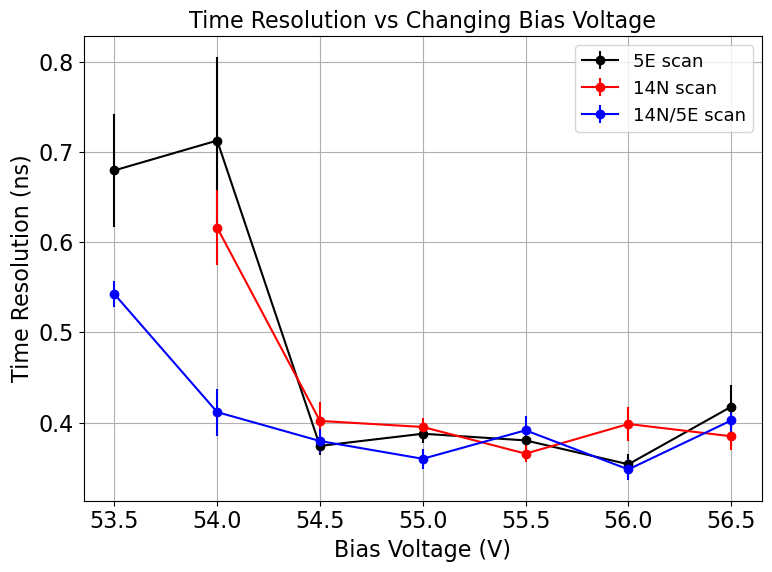

In [31]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E,tres_5E, tresu_5E, fmt='o-', label='5E scan', color='black')
plt.errorbar(vbias_14N,tres_14N, tresu_14N, fmt='o-', label='14N scan', color='red')
plt.errorbar(vbias_14N_5E,tres_14N_5E, tresu_14N_5E, fmt='o-', label='14N/5E scan', color='blue')
plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()

In [32]:
vbias_14N_5E_14Nmeasured= [
53.665,
54.137,
54.6,
55.034,
55.455,
55.879,
56.086,
                          ]
vbias_14N_5E_5Emeasured= [
53.498,
53.98,
54.434,
54.889,
55.319,
55.756,
55.925
]
vbias_14N_14Nmeasured= [
54.139,
54.597,
55.034,
55.438,
55.856,
56.062,
]
vbias_5E_5Emeasured= [53.502,
53.978,
54.431,
54.889,
55.327,
55.773,
55.954,
]

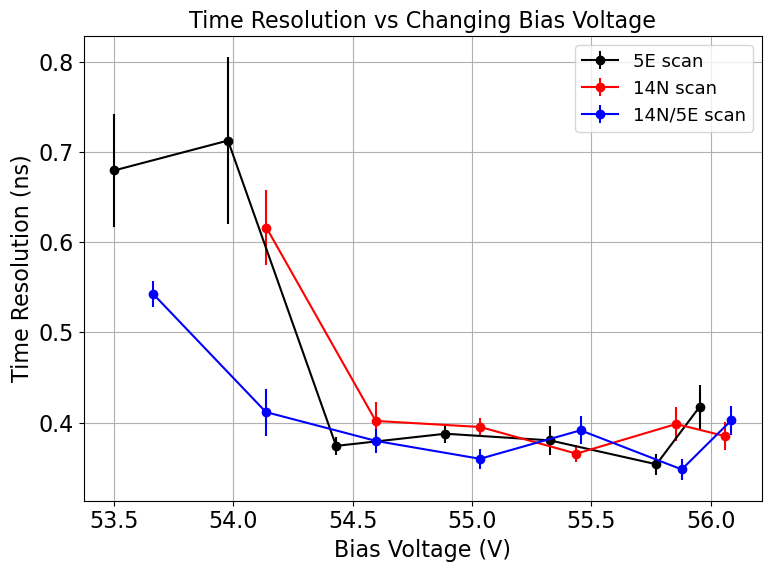

In [33]:
# Plot
plt.figure(figsize=(8,6))

plt.errorbar(vbias_5E_5Emeasured,tres_5E, tresu_5E, fmt='o-', label='5E scan', color='black')
plt.errorbar(vbias_14N_14Nmeasured,tres_14N, tresu_14N, fmt='o-', label='14N scan', color='red')
plt.errorbar(vbias_14N_5E_14Nmeasured,tres_14N_5E, tresu_14N_5E, fmt='o-', label='14N/5E scan', color='blue')
plt.xlabel("Bias Voltage (V)")
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

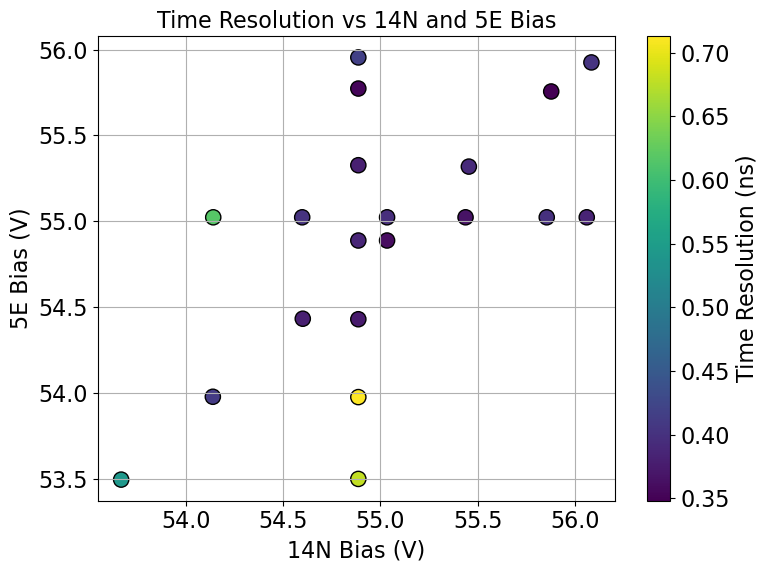

In [34]:
import matplotlib.pyplot as plt

# === Bias coordinates and time resolutions for all runs ===

# Diagonal scan: both 14N and 5E varied
x_14N_5E = [53.665, 54.137, 54.6, 55.034, 55.455, 55.879, 56.086]     # 14N bias
y_14N_5E = [53.498, 53.98, 54.434, 54.889, 55.319, 55.756, 55.925]    # 5E bias
z_14N_5E = [0.5426, 0.4117, 0.3796, 0.3599, 0.3915, 0.3481, 0.4024]   # time resolution

# Vertical scan: 14N varied, 5E fixed
x_14N_only = [54.139, 54.597, 55.034, 55.438, 55.856, 56.062]
y_14N_only = [55.024] * len(x_14N_only)
z_14N_only = [0.6163, 0.4019, 0.3952, 0.3656, 0.3985, 0.3849]

# Horizontal scan: 5E varied, 14N fixed
x_5E_only = [54.886] * 7
y_5E_only = [53.502, 53.978, 54.431, 54.889, 55.327, 55.773, 55.954]
z_5E_only = [0.6798, 0.7129, 0.3742, 0.3877, 0.3803, 0.3538, 0.4176]

# === Combine all into single lists ===
x_all = x_14N_5E + x_14N_only + x_5E_only
y_all = y_14N_5E + y_14N_only + y_5E_only
z_all = z_14N_5E + z_14N_only + z_5E_only

# === Plot ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(x_all, y_all, c=z_all, cmap='viridis', s=120, edgecolor='k')
plt.colorbar(sc, label="Time Resolution (ns)")
plt.xlabel("14N Bias (V)")
plt.ylabel("5E Bias (V)")
plt.title("Time Resolution vs 14N and 5E Bias")
plt.grid(True)
plt.tight_layout()
plt.show()


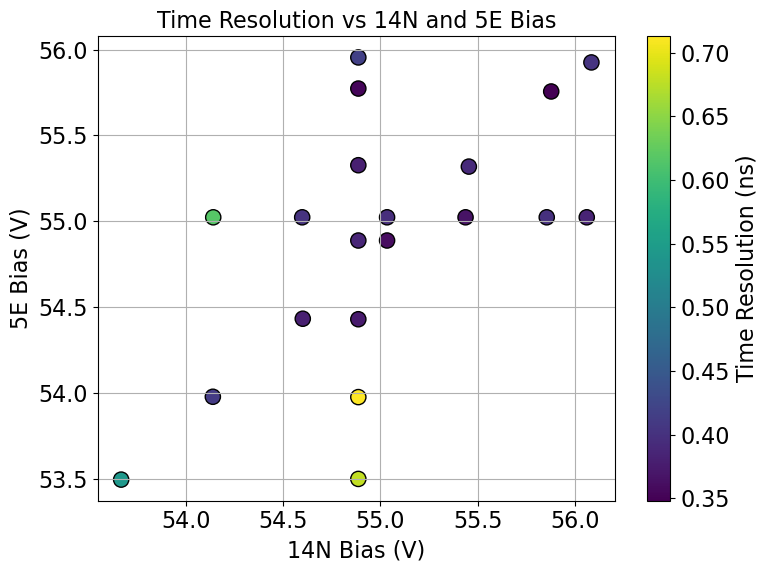

In [35]:
import matplotlib.pyplot as plt

# === Bias coordinates and time resolutions for all runs ===

# Diagonal scan: both 14N and 5E varied
x_14N_5E = [53.665, 54.137, 54.6, 55.034, 55.455, 55.879, 56.086]     # 14N bias
y_14N_5E = [53.498, 53.98, 54.434, 54.889, 55.319, 55.756, 55.925]    # 5E bias
z_14N_5E = [0.5426, 0.4117, 0.3796, 0.3599, 0.3915, 0.3481, 0.4024]   # time resolution

# Vertical scan: 14N varied, 5E fixed
x_14N_only = [54.139, 54.597, 55.034, 55.438, 55.856, 56.062]
y_14N_only = [55.024] * len(x_14N_only)
z_14N_only = [0.6163, 0.4019, 0.3952, 0.3656, 0.3985, 0.3849]

# Horizontal scan: 5E varied, 14N fixed
x_5E_only = [54.886] * 7
y_5E_only = [53.502, 53.978, 54.431, 54.889, 55.327, 55.773, 55.954]
z_5E_only = [0.6798, 0.7129, 0.3742, 0.3877, 0.3803, 0.3538, 0.4176]

# === Combine all into single lists ===
x_all = x_14N_5E + x_14N_only + x_5E_only
y_all = y_14N_5E + y_14N_only + y_5E_only
z_all = z_14N_5E + z_14N_only + z_5E_only

# === Plot ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(x_all, y_all, c=z_all, cmap='viridis', s=120, edgecolor='k')
plt.colorbar(sc, label="Time Resolution (ns)")
plt.xlabel("14N Bias (V)")
plt.ylabel("5E Bias (V)")
plt.title("Time Resolution vs 14N and 5E Bias")
plt.grid(True)
plt.tight_layout()
plt.show()


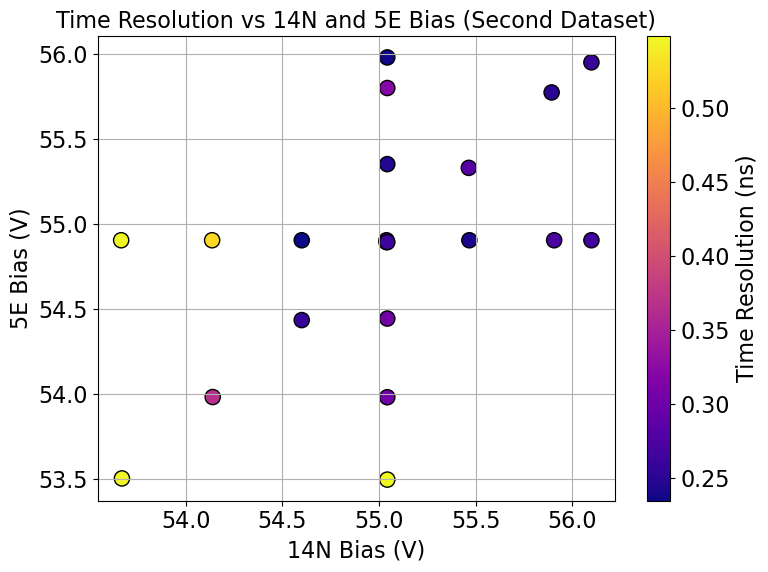

In [36]:
import matplotlib.pyplot as plt

# === Second dataset ===

# Diagonal scan: both 14N and 5E varied
x_14N_5E_2 = [53.669, 54.139, 54.6, 55.039, 55.465, 55.894, 56.1]
y_14N_5E_2 = [53.502, 53.981, 54.434, 54.893, 55.33, 55.774, 55.951]
z_14N_5E_2 = [0.5445, 0.3662, 0.2569, 0.2648, 0.2819, 0.2496, 0.2586]

# Vertical scan: 14N varied, 5E fixed at 54.904
x_14N_only_2 = [53.665, 54.136, 54.6, 55.039, 55.468, 55.907, 56.1]
y_14N_only_2 = [54.904] * len(x_14N_only_2)
z_14N_only_2 = [0.5467, 0.5249, 0.2346, 0.2648, 0.2412, 0.2722, 0.2668]

# Horizontal scan: 5E varied, 14N fixed at 55.043
x_5E_only_2 = [55.043] * 7
y_5E_only_2 = [53.495, 53.98, 54.443, 54.893, 55.352, 55.8, 55.98]
z_5E_only_2 = [0.5483, 0.3037, 0.3043, 0.2648, 0.2465, 0.3213, 0.2369]

# Combine all points
x_all_2 = x_14N_5E_2 + x_14N_only_2 + x_5E_only_2
y_all_2 = y_14N_5E_2 + y_14N_only_2 + y_5E_only_2
z_all_2 = z_14N_5E_2 + z_14N_only_2 + z_5E_only_2

# === Plot ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(x_all_2, y_all_2, c=z_all_2, cmap='plasma', s=120, edgecolor='k')
plt.colorbar(sc, label="Time Resolution (ns)")
plt.xlabel("14N Bias (V)")
plt.ylabel("5E Bias (V)")
plt.title("Time Resolution vs 14N and 5E Bias (Second Dataset)")
plt.grid(True)
plt.tight_layout()
plt.show()


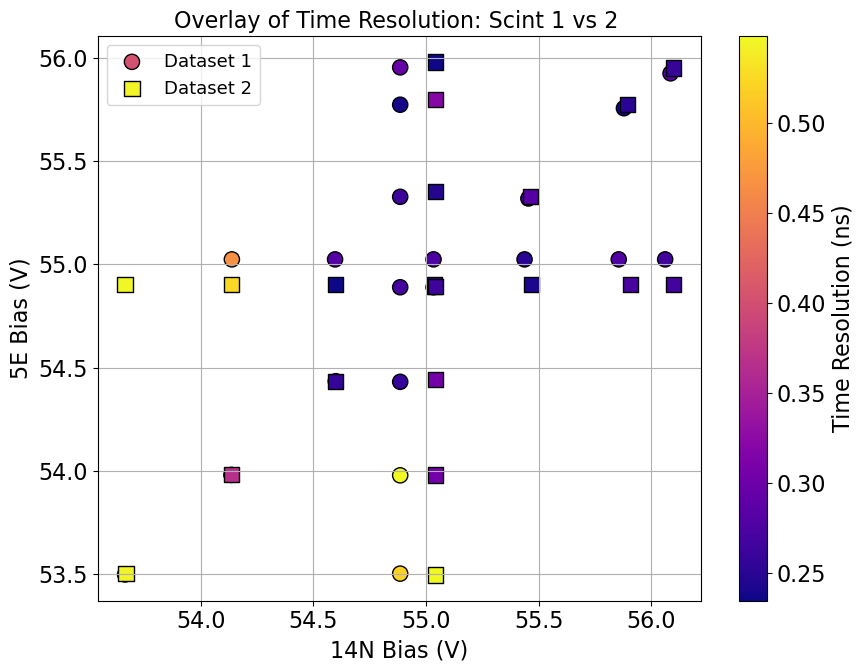

In [37]:
import matplotlib.pyplot as plt

# === First Dataset ===

x_1 = [53.665, 54.137, 54.6, 55.034, 55.455, 55.879, 56.086] + \
      [54.139, 54.597, 55.034, 55.438, 55.856, 56.062] + \
      [54.886] * 7

y_1 = [53.498, 53.98, 54.434, 54.889, 55.319, 55.756, 55.925] + \
      [55.024] * 6 + \
      [53.502, 53.978, 54.431, 54.889, 55.327, 55.773, 55.954]

z_1 = [0.5426, 0.4117, 0.3796, 0.3599, 0.3915, 0.3481, 0.4024] + \
      [0.6163, 0.4019, 0.3952, 0.3656, 0.3985, 0.3849] + \
      [0.6798, 0.7129, 0.3742, 0.3877, 0.3803, 0.3538, 0.4176]

# === Second Dataset ===

x_2 = [53.669, 54.139, 54.6, 55.039, 55.465, 55.894, 56.1] + \
      [53.665, 54.136, 54.6, 55.039, 55.468, 55.907, 56.1] + \
      [55.043] * 7

y_2 = [53.502, 53.981, 54.434, 54.893, 55.33, 55.774, 55.951] + \
      [54.904] * 7 + \
      [53.495, 53.98, 54.443, 54.893, 55.352, 55.8, 55.98]

z_2 = [0.5445, 0.3662, 0.2569, 0.2648, 0.2819, 0.2496, 0.2586] + \
      [0.5467, 0.5249, 0.2346, 0.2648, 0.2412, 0.2722, 0.2668] + \
      [0.5483, 0.3037, 0.3043, 0.2648, 0.2465, 0.3213, 0.2369]

# === Plotting ===

plt.figure(figsize=(9, 7))

# Plot dataset 1 (circles)
sc1 = plt.scatter(x_1, y_1, c=z_1, cmap='plasma', s=120, edgecolor='k', marker='o', label='Dataset 1')

# Plot dataset 2 (squares)
sc2 = plt.scatter(x_2, y_2, c=z_2, cmap='plasma', s=120, edgecolor='k', marker='s', label='Dataset 2')

# Add colorbar (optional: use a unified scale if datasets are comparable)
plt.colorbar(sc2, label="Time Resolution (ns)")

plt.xlabel("14N Bias (V)")
plt.ylabel("5E Bias (V)")
plt.title("Overlay of Time Resolution: Scint 1 vs 2 ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


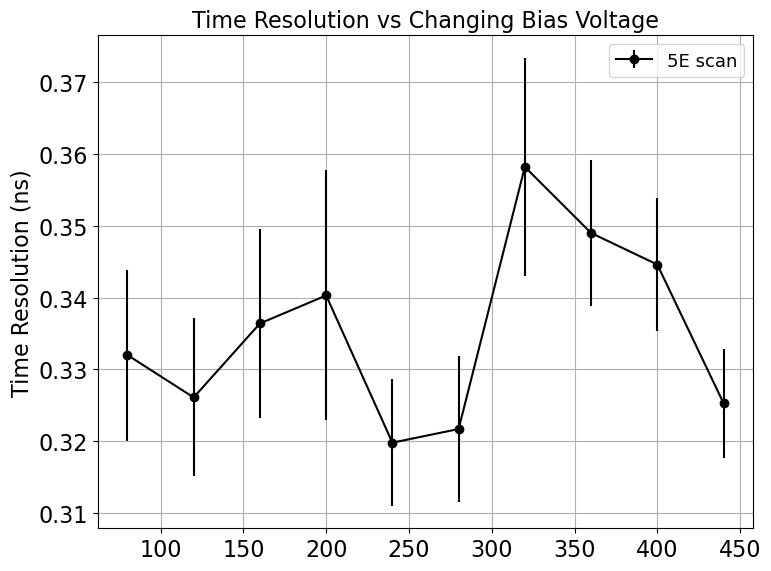

In [38]:
# Plot
threshold=[80,120,160,200,240,280,320,360,400,440]
time_res1 = [0.332, 0.3261, 0.3364, 0.3403, 0.3198, 0.3217, 0.3582, 0.349, 0.3446, 0.3253]
time_res1_u = [0.0119, 0.011, 0.0132, 0.0174, 0.0088, 0.0101, 0.0152, 0.0102, 0.0093, 0.0076]
plt.figure(figsize=(8,6))

plt.errorbar(threshold,time_res1, time_res1_u, fmt='o-', label='5E scan', color='black')
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

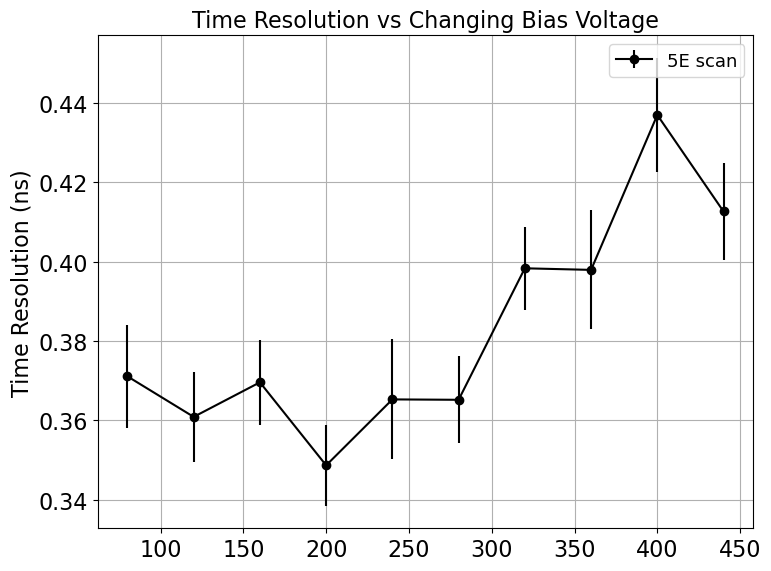

In [39]:
# Plot
threshold=[80,120,160,200,240,280,320,360,400,440]
time_res2 = [0.3711, 0.3609, 0.3696, 0.3487, 0.3653, 0.3652, 0.3983, 0.3979, 0.4369, 0.4126]
time_res2_u = [0.0129, 0.0113, 0.0107, 0.0102, 0.0151, 0.0109, 0.0105, 0.015, 0.0144, 0.0123]
plt.figure(figsize=(8,6))

plt.errorbar(threshold,time_res2, time_res2_u, fmt='o-', label='5E scan', color='black')
plt.ylabel("Time Resolution (ns)")
plt.title("Time Resolution vs Changing Bias Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

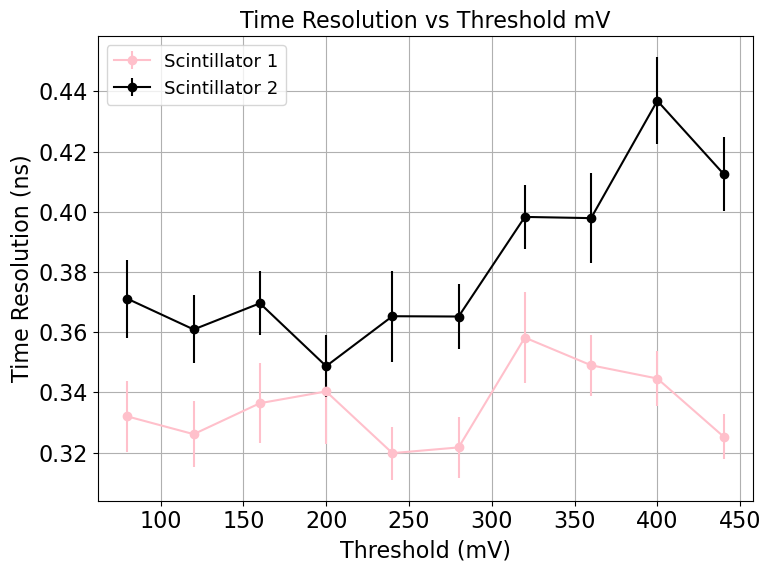

In [40]:
plt.figure(figsize=(8,6))
plt.errorbar(threshold,time_res1, time_res1_u, fmt='o-', label='Scintillator 1', color='pink')
plt.errorbar(threshold,time_res2, time_res2_u, fmt='o-', label='Scintillator 2', color='black')
plt.ylabel("Time Resolution (ns)")
plt.xlabel("Threshold (mV)")
plt.title("Time Resolution vs Threshold mV")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

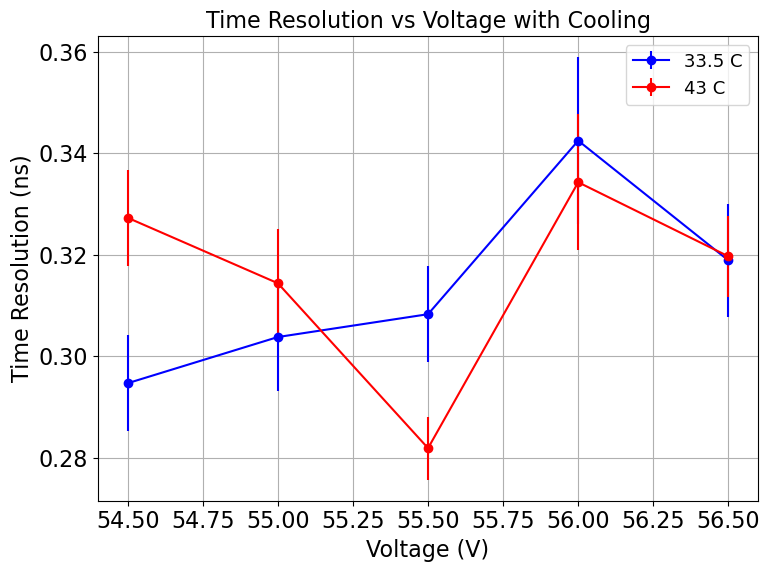

In [41]:
plt.figure(figsize=(8,6))
vbias= [54.5,55,55.5,56,56.5]
time_res_33 = [0.2947, 0.3038, 0.3083, 0.3425, 0.3189]
time_res_u_33 = [0.0095, 0.0106, 0.0095, 0.0164, 0.0111]
time_res_43 = [0.3273, 0.3144, 0.2819, 0.3343, 0.3197]
time_res_u_43 = [0.0095, 0.0107, 0.0062, 0.0134, 0.008]
plt.errorbar(vbias,time_res_33,time_res_u_33, fmt='o-', label='33.5 C', color='blue')
plt.errorbar(vbias,time_res_43, time_res_u_43, fmt='o-', label='43 C', color='red')
plt.ylabel("Time Resolution (ns)")
plt.xlabel("Voltage (V)")
plt.title("Time Resolution vs Voltage with Cooling")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()